<a href="https://colab.research.google.com/github/kAi3345/Astron/blob/main/exoplanet/Exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
from google.colab import files
uploaded = files.upload()

Saving HD209458b.txt to HD209458b.txt


In [3]:
dat = astropy.io.ascii.read("HD209458b.txt")

Text(0, 0.5, 'Normalize Flux')

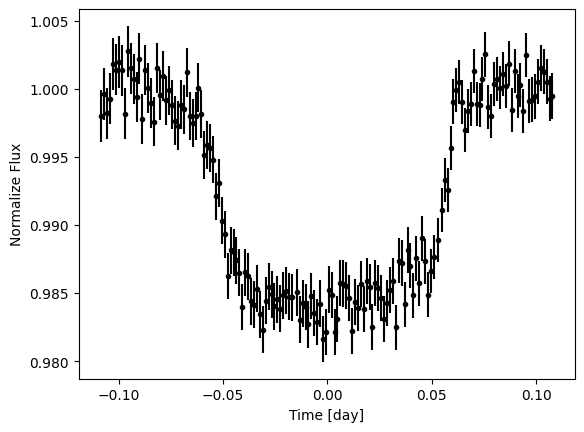

In [4]:
time = dat["col1"] - np.median(dat["col1"])
rel_mag = dat["col2"]
flux = 2.514**(1.0 - rel_mag)
err = dat["col3"]
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

In [6]:
# define a function that take the input data
def box_model(t, center_time, duration, depth, delta_flux):
  f = np.zeros(np.shape(t))                            # create a empty array of input size to make sure number of output equal to input
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))        # window of in transit data that have distance to center less than half of the duration
  f[ind] = 1.0 + delta_flux - depth                                   # for in transit data,
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0))       # window of out of transit data that have distance to center more than half of duration
  f[ind] = 1.0 + delta_flux
  return(f)                   # return the model

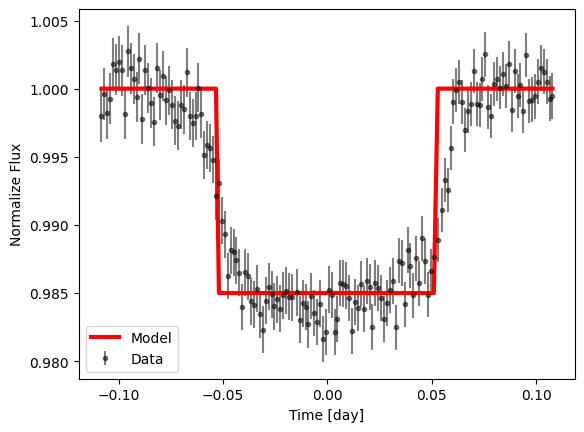

In [7]:
center_time, duration, depth, delta_flux = 0.0, 0.105, 0.015, 0.0                   # set these value to produce the roughly best fit model according to graph
model = box_model(time, center_time, duration, depth, delta_flux)                   # produce the box model using the function defined previously
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")     # plot the data
plt.plot(time, model, color="red", linewidth=3.0, label="Model")                # plot the model
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();